# Project Name: Customer Segmentation based on Personality

### Goal: To split users/customers into segments based on behavior.

**Dataset**: Kaggle Customer Personality Analysis Dataset (https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

**About the Project**: In today’s era, companies work hard to make their customers happy. They launch new technologies and services so that customers can use their products more. They try to be in touch with each of their customers so that they can provide goods accordingly. But practically, it’s very difficult and non-realistic to keep in touch with everyone.<br>
For this, the solution is to create segments of customers based on similar behavioral patterns, and use an algorhithm to keep in touch with all people of any particular segment. This is a much more feasible solution.<br>

To facilitate this, we create a Machine Learning model, which when fed with appropriate data can create certain number of segments within it, hence making the desire to keep in touch with each user according to their needs possible.

### Section 1: Collecting the data

First off all, the necessary libraries need to be imported

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/goura/Desktop/Data Science/Datasets/Customer Personality Analysis.csv", sep="\t")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
data.shape

(2240, 29)

In [4]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Section 2: Data Cleaning / Manipulation

At the very first, we can remove the 'ID' column, because it doesn't have any actual influence or isnt a consequence of a person's behavior.

In [6]:
data=data.drop("ID", axis=1)

What's visible is that there's a column called "Dt_Customer" which encapsulates informtion about the date.<br>
We can split up the date to form 3 columns "Year","Month",Day" for better performance.

In [7]:
parts = data["Dt_Customer"].str.split("-",n=3,expand=True)
data["day"] = parts[0].astype('int')
data["month"] = parts[1].astype('int')
data["year"] = parts[2].astype('int')

In [8]:
data = data.drop('Dt_Customer',axis=1)

Now, we do have a few columns which are "object" type, which means we need to encode such columns.

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
nums = []
objs = []
for i in data.columns:
    if data[i].dtype == object:
        objs.append(i)
    else:
        nums.append(i)
print(objs)

['Education', 'Marital_Status']


As well as encoding, we will have to keep track of which object gets encoded to which numeric value, for which we initialize a list.

In [11]:
codeval=[]
for i in objs:
    data[i] = encoder.fit_transform(data[i])
    codeval.append(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

In [12]:
codeval

[{'2n Cycle': 0, 'Basic': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4},
 {'Absurd': 0,
  'Alone': 1,
  'Divorced': 2,
  'Married': 3,
  'Single': 4,
  'Together': 5,
  'Widow': 6,
  'YOLO': 7}]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   int32  
 2   Marital_Status       2240 non-null   int32  
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

Since we will need this information later, lets create dictionaries to keep note of which object was encoded to which numeric value for each of the columns.

In [14]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,day,month,year
0,1957,2,4,58138.0,0,0,58,635,88,546,...,0,0,0,0,3,11,1,4,9,2012
1,1954,2,4,46344.0,1,1,38,11,1,6,...,0,0,0,0,3,11,0,8,3,2014
2,1965,2,5,71613.0,0,0,26,426,49,127,...,0,0,0,0,3,11,0,21,8,2013
3,1984,2,5,26646.0,1,0,26,11,4,20,...,0,0,0,0,3,11,0,10,2,2014
4,1981,4,3,58293.0,1,0,94,173,43,118,...,0,0,0,0,3,11,0,19,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,3,61223.0,0,1,46,709,43,182,...,0,0,0,0,3,11,0,13,6,2013
2236,1946,4,5,64014.0,2,1,56,406,0,30,...,0,1,0,0,3,11,0,10,6,2014
2237,1981,2,2,56981.0,0,0,91,908,48,217,...,0,0,0,0,3,11,0,25,1,2014
2238,1956,3,5,69245.0,0,1,8,428,30,214,...,0,0,0,0,3,11,0,24,1,2014


In [15]:
columns = [ i for i in data.columns ]

All of the essential changes to the data have been done.<br>
We can further Standardize the data to make it easier for the model to learn from.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[columns] = scaler.fit_transform(data[columns])
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,day,month,year
0,-0.985345,-0.350141,0.251004,0.234063,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,2.388846,-1.324242,0.726520,-1.502225
1,-1.235733,-0.350141,0.251004,-0.234559,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,-0.869113,-0.994691,1.420036
2,-0.317643,-0.350141,1.180340,0.769478,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,0.610056,0.439652,-0.041094
3,1.268149,-0.350141,1.180340,-1.017239,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,-0.641549,-1.281560,1.420036
4,1.017761,1.428354,-0.678332,0.240221,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,0.382491,-1.568428,1.420036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.150717,-0.350141,-0.678332,0.356642,-0.825218,0.906934,-0.107383,1.203678,0.419916,0.066692,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,-0.300202,-0.134085,-0.041094
2236,-1.903435,1.428354,1.180340,0.467539,2.890335,0.906934,0.237969,0.303291,-0.661449,-0.606873,...,-0.28014,3.815174,-0.11651,-0.097282,0.0,0.0,-0.418612,-0.641549,-0.134085,1.420036
2237,1.017761,-0.350141,-1.607669,0.188091,-0.825218,-0.929894,1.446700,1.795020,0.545656,0.221789,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,1.065185,-1.568428,1.420036
2238,-1.068807,0.539106,1.180340,0.675388,-0.825218,0.906934,-1.419719,0.368666,0.092992,0.208495,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,0.951402,-1.568428,1.420036


Lets have a look at the correlation matrix of this dataset

In [17]:
corr_matrix = data.corr()
corr_matrix

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,day,month,year
Year_Birth,1.000000,-0.171390,-0.060580,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,...,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325,-0.009193,0.024246,-0.028188
Education,-0.171390,1.000000,0.007090,0.120692,-0.045564,0.118485,-0.011728,0.197576,-0.080412,0.033625,...,0.033346,-0.010845,0.021369,-0.050540,NaN,NaN,0.090819,0.018291,-0.011304,0.045356
Marital_Status,-0.060580,0.007090,1.000000,0.021353,-0.022553,-0.003596,0.014159,0.008205,0.000593,0.030689,...,0.012817,-0.017097,0.018417,-0.005718,NaN,NaN,-0.011403,-0.016087,0.017708,-0.018176
Income,-0.161791,0.120692,0.021353,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,...,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047,-0.031244,-0.014955,0.022451
Kidhome,0.230176,-0.045564,-0.022553,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,...,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008,-0.001718,-0.023571,0.053339
Teenhome,-0.352111,0.118485,-0.003596,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,...,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446,0.005697,-0.014124,-0.008260
Recency,-0.019871,-0.011728,0.014159,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,...,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437,0.010877,0.014040,-0.026084
MntWines,-0.157773,0.197576,0.008205,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,...,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254,-0.000413,0.046139,-0.154188
MntFruits,-0.017917,-0.080412,0.000593,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,...,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289,-0.020998,0.003741,-0.055150
MntMeatProducts,-0.030872,0.033625,0.030689,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,...,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335,-0.012561,0.018390,-0.082472


We see something strange, there are Null correlation values for all columns with Z_CostContact & Z_Revenue<br>
Looking back at the dataset, we can notice that all values for both the columns are 0, post standardization.

In [18]:
print(data['Z_CostContact'].unique())
print(data['Z_Revenue'].unique())

[0.]
[0.]


Since either of those are just constant values, they play no significant role in our data, thus it is safe & wise to drop them.

In [19]:
data = data.drop("Z_CostContact",axis=1)
data = data.drop("Z_Revenue",axis=1)

Our next step would be to drop all the Null values.

In [20]:
data = data.dropna(axis=0)

Since our data has now been finalized, lets try to visualize this using a correlation matrix.

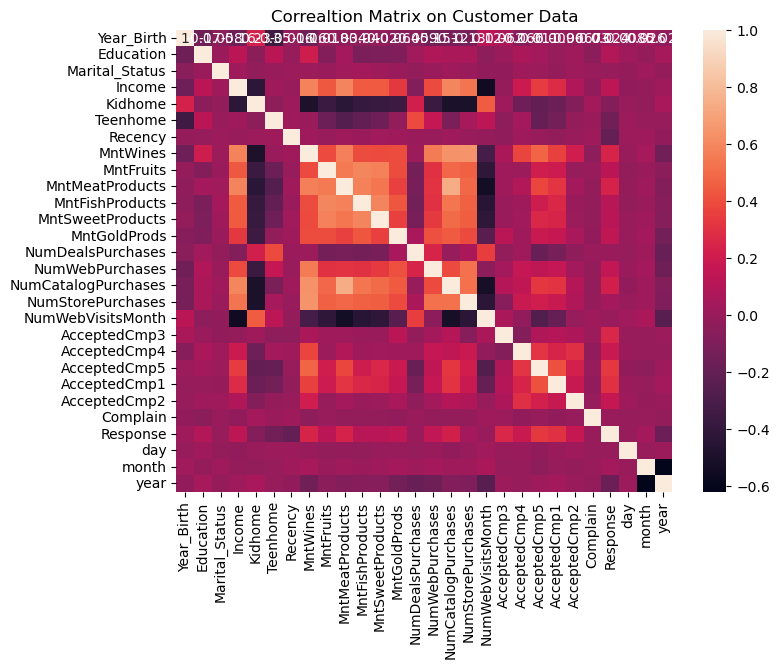

In [21]:
corr_matrix = data.corr()
plt.figure(figsize=(8,6))
plt.title("Correaltion Matrix on Customer Data") 
sns.heatmap(corr_matrix,annot=True)
plt.show()

Lets move on to the creation of the required Machine Learning Model.

### Section 3: Model Selection

We will be using T-distributed Stochastic Neighbor Embedding. It helps in visualizing high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the values to low-dimensional embedding.<br>
Note: Maximum permitted dimetion: 3

In [22]:
from sklearn.manifold import TSNE
model = TSNE(n_components = 2, random_state=30)
tsne_data = model.fit_transform(data)
tsne_data

array([[ 30.011686 ,  28.94765  ],
       [-10.480262 , -31.956112 ],
       [ 30.15759  ,   1.3275617],
       ...,
       [ 51.3011   , -26.50215  ],
       [ 19.630033 ,  -7.863148 ],
       [-18.908077 ,  22.416216 ]], dtype=float32)

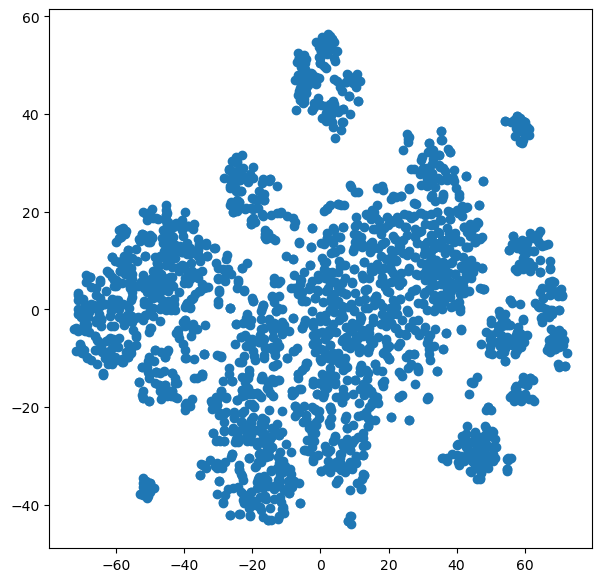

In [23]:
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

From this diagram, some clusters are already visible.<br>
But, there's a issue we will face latter on. Due to very the points being very evenly scattered, we may need a large no of clusters to reach optimal state.<br>
This simply means the customers are a diverse set of people, which is often seen when countering a large userbase/mainstream app.

We will be using the KMeans model to form the clusters.

We plot down the error of the clustering for a large range of "number of clusters" (0-100)<br>
Visualizing the graph can help us with finding the optimal number of clusters.<br>
How? The number from which onwards the error starts becoming a straight line, is the optimal point.<br>

Two possible scenarios-
* The straight line is nearly flat/parallel to the X-axis
* The straight line still has a significant negative slope.

The first scenario is favourable, but in the second scenario, the ony options to flatten the line error-number line is to increase the number of clusters.
Generally, it'd be a very large number compared to what we defined as the "optimal" number.
So, unless the company has the resources to manage a large number of clusters and is willing to, we settle with the defined optimal number.

In [24]:
from sklearn.cluster import KMeans
error = []
for n_clusters in range(1, 100):
    model = KMeans(init='k-means++',
                   n_clusters=n_clusters,
                   max_iter=500,
                   random_state=22)
    model.fit(data)
    error.append(model.inertia_)

Note: In model.intertia_, .inertia is simply the error between all points of a cluster, summed up for all clusters.

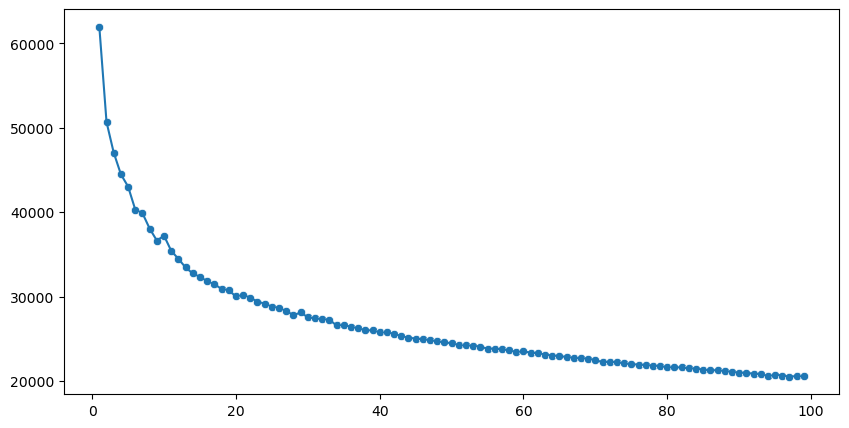

In [25]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 100), y=error)
sns.scatterplot(x=range(1, 100), y=error)
plt.show()

The error decrease reaches constant slope at around 15-20 clusters, even if the slope is still a significant one.<br>
We will continue with 20 to be our optimal number of clusters, because affording more clusters places a financial burden on the company in question.

In [26]:
model = KMeans ( init = 'k-means++',
                n_clusters = 20,
                max_iter = 100,
                random_state = 42)
segments = model.fit_predict(data)

In [27]:
segments

array([19,  4,  1, ..., 15, 10, 18])

Segments now determines each instance/row/data point's cluster.

Lets plot our findings for a better understanding.

In [28]:
palette = sns.color_palette("husl", len(np.unique(segments)))

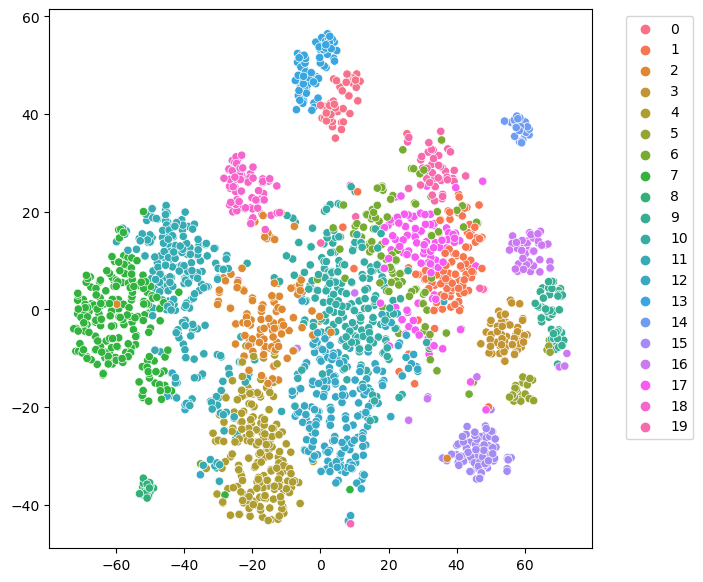

In [29]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=segments, palette = palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

This above plot represents our clusters. While there is a rough boundary between all clusters, its not very clear to the eye due to frequent errors in classification, caused by the diversity.

Now, we shall proceed to make our program user-interactive, such that a person can be classified based on their behavioral patterns, provided as input.

### Section 4: User-Interactive Space

In [30]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'day', 'month', 'year'],
      dtype='object')

In [32]:
ques = [ i for i in data.columns ]
c=0
while True:
    if c==0:
        print("Do you want to make any predictions?")
    elif c>0:
        print("Do you want to make any more predictions?")
    print("Enter 1 if Yes, else 0")
    a = int(input("Choice:"))
    if a!=0 and a!=1:
        print("Invalid Choice")
    elif a==0:
        print("Choice is No (0)")
        print("Exit Program")
        if c>0:
            print("Thank you for using our services.")
        break
    elif a==1:
        print("Choice is Yes (1)")
        lst = []
        for i in ques:
            if i not in ["Marital_Status","Education"]:
                lst.append(float(input(f"Enter value of {i}: ")))
            else:
                a=input(f"Enter value of {i}: ")
                a =codeval[objs.index(i)][a]
                lst.append(a)
        df = pd.DataFrame([lst], columns=ques)
        df[ques] = scaler.fit_transform(df[ques])
        preds = model.predict(df)
        print("Reported Parameters: ",lst)
        print("The customer is determined to be of cluster",preds[0])
        c+=1

Do you want to make any predictions?
Enter 1 if Yes, else 0


Choice: 1


Choice is Yes (1)


Enter value of Year_Birth:  2005
Enter value of Education:  Graduation
Enter value of Marital_Status:  Single
Enter value of Income:  50000
Enter value of Kidhome:  0
Enter value of Teenhome:  0
Enter value of Recency:  3
Enter value of MntWines:  4
Enter value of MntFruits:  2
Enter value of MntMeatProducts:  5
Enter value of MntFishProducts:  7
Enter value of MntSweetProducts:  2
Enter value of MntGoldProds:  5
Enter value of NumDealsPurchases:  20
Enter value of NumWebPurchases:  32
Enter value of NumCatalogPurchases:  34
Enter value of NumStorePurchases:  55
Enter value of NumWebVisitsMonth:  11
Enter value of AcceptedCmp3:  3
Enter value of AcceptedCmp4:  5
Enter value of AcceptedCmp5:  52
Enter value of AcceptedCmp1:  6
Enter value of AcceptedCmp2:  7
Enter value of Complain:  3
Enter value of Response:  4
Enter value of day:  5
Enter value of month:  6
Enter value of year:  2022


Reported Parameters:  [2005.0, 2, 4, 50000.0, 0.0, 0.0, 3.0, 4.0, 2.0, 5.0, 7.0, 2.0, 5.0, 20.0, 32.0, 34.0, 55.0, 11.0, 3.0, 5.0, 52.0, 6.0, 7.0, 3.0, 4.0, 5.0, 6.0, 2022.0]
The customer is determined to be of cluster 12
Do you want to make any more predictions?
Enter 1 if Yes, else 0


Choice: 0


Choice is No (0)
Exit Program
Thank you for using our services.


Since the model has been defined, and set to actively accept provided data and provide predicted classifications,<br>
our program is ready to use and the project is complete.

### Conclusion

This marks the end of our project.

This program assists us in classifying the customers of the store/app based on their behavioral patterns.<br>
We acheived this via creating a KMeans Model.

We noticed that the error-n_clusters line had a significant downwards slope after straightening, for the provided data, thus we can conclude the dataset to be very diverse and thus tough to classify. Despite that, our model has perfomed fairly well and provided us with visually-distinctive clusters.<br>
Therefore, the Program is ready to be used.